In [442]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [481]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.datasets.mldata import fetch_mldata
import tempfile
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn import linear_model as lm
from anytime_regression import *

In [434]:
lam = np.logspace(-5,5,100)

**Synthetic Experiment** --- **Catogorical Data**

**Data Generation**:                                                                                                    
1) First generate y: randomly pick up 1 or -1.                                                                                
2) Initialize all x1 and x2 with same value of y.                                                                      
3) Randomly flip 10% of x1 and 40% of x2 --- x1 is better feature with 90% accuracy while x2 has 60% accuracy.             
4) Set the probability for each feature to show up at prediction as (0.2 and 0.9)                                      
5) Finished.

In [519]:
### Generate Dataset
n = 5000 #number of training data and testing data respectively
d = 2
p = np.array([0.2,0.9]) ## x1 has 90% accuracy and x2 has 60% accuracy
X_train,y_train = generate_synthetic_data(n,d,p)
X_test_o,y_test = generate_synthetic_data(n,d,p)
X_test = modify_data(X_test_o,X_train,p)
X_val,y_val = generate_synthetic_data(n,d,p)

vanilla ridge regression

In [522]:
w_vrr = vanilla_ridge_regression(X_train,y_train,1)
print 'weight: ', w_vrr
error = prediction_error(X_test,y_test,w_vrr,'classification')
print 'error: ', error
y_pred = predict(X_test,w_vrr,'classification')
print 'y_pred: ', y_pred
print 'y_test: ', y_test

weight:  [ 0.79464608  0.05970908]
error:  0.4238
y_pred:  [-1  1 -1 ..., -1  1  1]
y_test:  [-1  1  1 ...,  1  1 -1]


query statistical learning

In [523]:
w_qsl = query_statistical_learning(X_train,y_train,1)
print 'weight: ', w_qsl
error = prediction_error(X_test,y_test,w_qsl,'qsl')
print 'error: ', error
print 'y_pred: ', y_pred
print 'y_test: ', y_test

weight:  {'1': array([ 0.80223955]), '0': array([ 0.,  0.]), '12': array([ 0.79464608,  0.05970908]), '2': array([ 0.16076785])}
error:  0.4366
y_pred:  [-1  1 -1 ..., -1  1  1]
y_test:  [-1  1  1 ...,  1  1 -1]


**Synthetic Experiment** --- __Regression Data__

**Data Generation**:                                                                            
1) draw x1 and x2 from Gaussian distributions N(x1,sigma1) and N(x2, sigma2)                   
2) x1 is better feature than x2 where x1 has smaller variance(sigma1=0.01) than x2 (sigma2=1)    
3) put more weight on x1 than x2: w1 = 0.5 and w2 = 0.2
4) generate y by y=w1*x1+w2*x2

In [524]:
#### Generate regression data
n=10000
d = 2
sigma = np.array([0.01,1])
w = np.array([0.5,0.2])
p = np.array([0.1,0.9])
noise = 1
x, X_train, y_train, X_test_ori, y_test = generate_synthetic_data_regression(n,d,sigma, w,p,noise)
X_test = modify_data(X_test_ori,X_train,p)
X_train_mod = modify_data(X_train,X_train,p)

vanilla ridge regression

In [530]:
w_vrr = vanilla_ridge_regression(X_train,y_train,1)
print 'weight: ', w_vrr
error = prediction_error(X_test,y_test,w_vrr,'regression')
print 'error(average Euclidean distance to the correct y): ', error
y_pred = predict(X_test,w_vrr,'regression')
print 'y_pred: ', y_pred
print 'y_test: ', y_test

weight:  [ 0.45987442  0.20454851]
error(average Euclidean distance to the correct y):  0.0149208984531
y_pred:  [ 1.34376451  0.72417853  1.47433638 ...,  0.91643381  2.1859448
  0.76707777]
y_test:  [ 0.66912801  2.7843933   3.2472747  ..., -0.12467781  2.88180167
  1.61025951]


query statistical learning 

In [534]:
w_qsl = query_statistical_learning(X_train,y_train,1)
print 'weight: ', w_qsl
error = prediction_error(X_test,y_test,w_qsl,'qsl_reg')
print 'error(average Euclidean distance to the correct y):', error
print 'y_pred: ', y_pred
print 'y_test: ', y_test

weight:  {'1': array([ 1.14571842]), '0': array([ 0.,  0.]), '12': array([ 0.45987442,  0.20454851]), '2': array([ 0.2790301])}
error(average Euclidean distance to the correct y): 0.0257203222652
y_pred:  [ 1.34376451  0.72417853  1.47433638 ...,  0.91643381  2.1859448
  0.76707777]
y_test:  [ 0.66912801  2.7843933   3.2472747  ..., -0.12467781  2.88180167
  1.61025951]


sampling method

In [535]:
w_vrr = vanilla_ridge_regression(X_train_mod,y_train,1)
print'weight: ',w_vrr
error = prediction_error(X_test,y_test,w_vrr, 'regression')
print 'error(average Euclidean distance to the correct y):', error
print 'y_pred: ', y_pred
print 'y_test: ', y_test

weight:  [ 0.49078007  0.19869643]
error(average Euclidean distance to the correct y): 0.014910358911
y_pred:  [ 1.34376451  0.72417853  1.47433638 ...,  0.91643381  2.1859448
  0.76707777]
y_test:  [ 0.66912801  2.7843933   3.2472747  ..., -0.12467781  2.88180167
  1.61025951]


**The below is some previous experiments. No need to look at them for now**

# Synthetic Exp1

In [308]:
n=10000
d = 2
#p = np.random.rand(d)
#sigma= np.random.rand(d)
#w = np.random.rand(d)
sigma = np.array([1,0.01])
w = np.array([0.5,0.02])
p = np.array([0.01,0.9])
noise = 1
x, X_train, y_train, X_test_ori, y_test = generate_synthetic_data(n,d,sigma, w,p,noise)
X_test = modify_data(X_test_ori,X_train,p)
X_train_mod = modify_data(X_train,X_train,p)

In [309]:
print 'p'
print p
print 'w'
print w
print 'sigma'
print sigma

p
[ 0.01  0.9 ]
w
[ 0.5   0.02]
sigma
[ 1.    0.01]


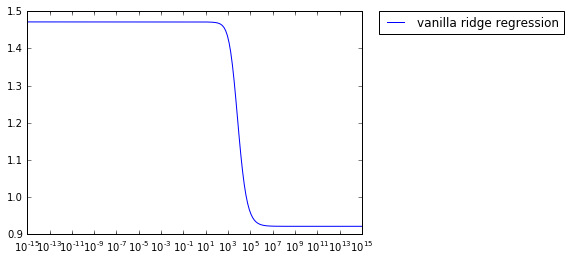

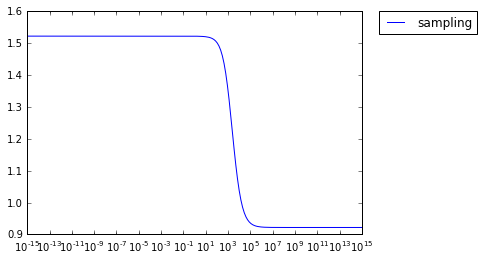

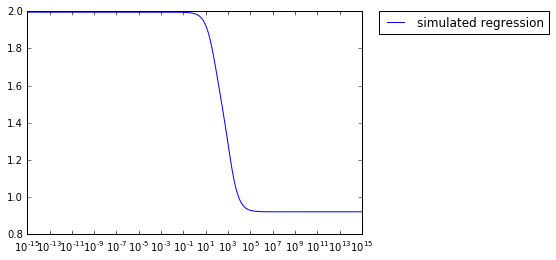

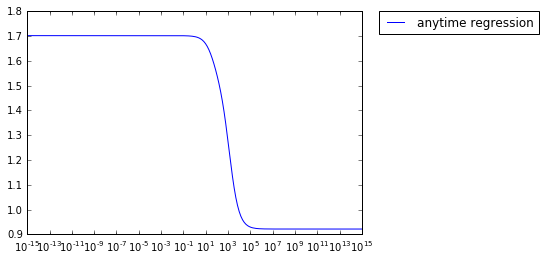

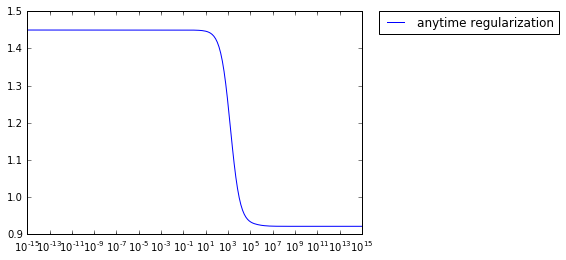

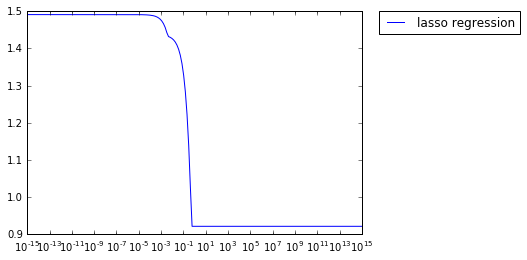

In [310]:
error_total = []
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

# sampling method
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam,label='sampling')
error_total.append(error)

# simulated regression 
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='simulated regression')
error_total.append(error)

# Anytime regression
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regression')
error_total.append(error)

# Anytime regularization
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regularization(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regularization')
error_total.append(error)

# vanilla lasso
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_lasso_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='lasso regression')
error_total.append(error)


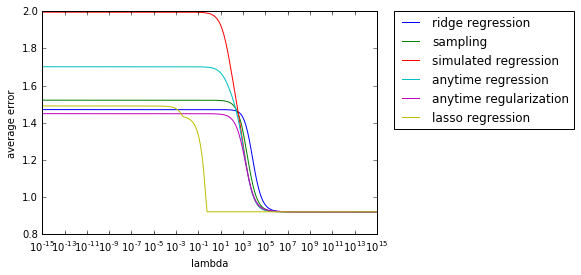

In [311]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='ridge regression')
ax.plot(lam,error_total[1], label='sampling')
ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.plot(lam,error_total[4], label='anytime regularization')
ax.plot(lam,error_total[5], label='lasso regression')
#ax.plot(lam,error_total[5], label='baseline')
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.legend(loc=0)
ax.set_xlabel('lambda')
ax.set_ylabel('average error')
plt.savefig('syn_draft_avg.pdf')
plt.show()

In [1086]:
import pickle

In [1096]:
f = open('error.pckl', 'w')
pickle.dump(error_total,f)
f.close()

In [1097]:
f = open('error.pckl', 'r')
err = pickle.load(f)
f.close()

# Boston data

In [312]:
boston = load_boston()
X = boston.data 
#X = preprocessing.normalize(X, norm='l2')
X = normalize(X)
y = boston.target
X_train = np.array(X[0:X.shape[0]/2,:])
y_train = np.array(y[0:X.shape[0]/2])
X_test = np.array(X[X.shape[0]/2:,:])
y_test = np.array(y[X.shape[0]/2:])

In [314]:
p = np.random.rand(X.shape[1])
#w = np.random.rand(X.shape[1])
X_train_mod = modify_data(X_train,X_train,p)
X_test = modify_data(X_test,X_train,p)

In [315]:
print 'p'
print p

p
[ 0.09559294  0.03504573  0.11707971  0.0042121   0.12994968  0.17373091
  0.17990074  0.23427899  0.49870561  0.56295088  0.25493968  0.75120912
  0.09134448]


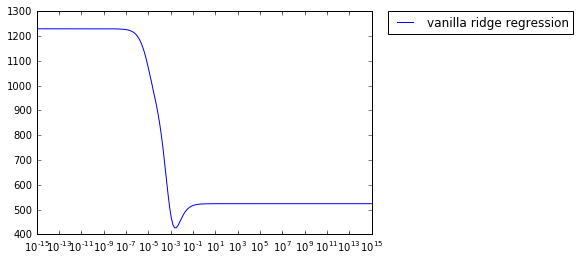

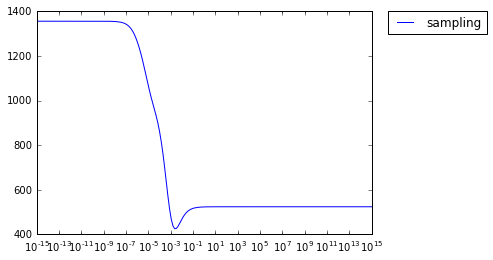

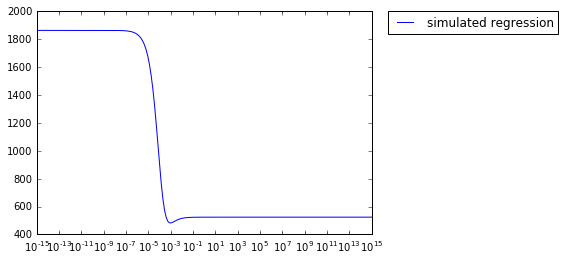

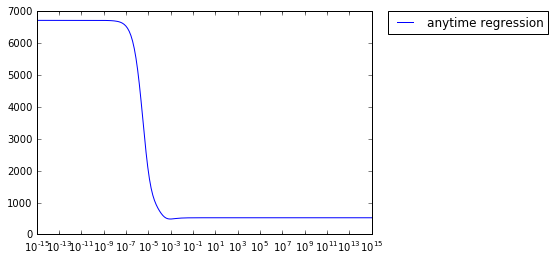

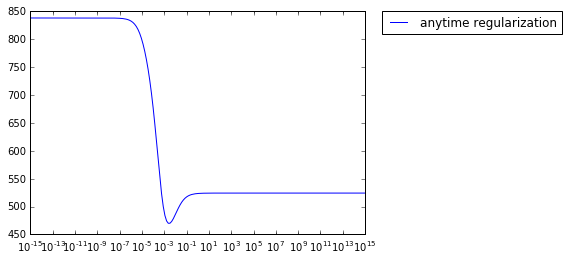

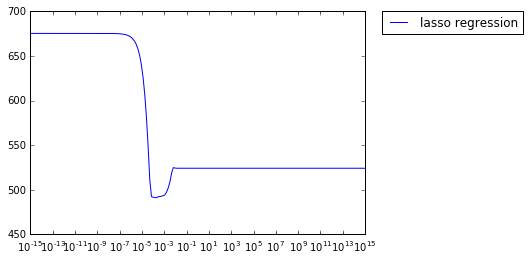

In [316]:
error_total = []
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

# sampling method
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam,label='sampling')
error_total.append(error)

# simulated regression 
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='simulated regression')
error_total.append(error)

# Anytime regression
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regression')
error_total.append(error)

# Anytime regularization
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regularization(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regularization')
error_total.append(error)

# vanilla lasso
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_lasso_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='lasso regression')
error_total.append(error)


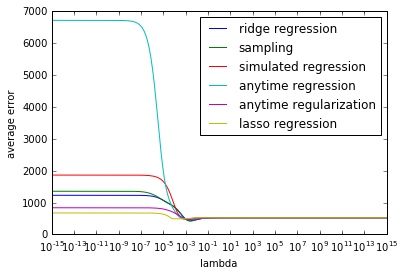

In [317]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='ridge regression')
ax.plot(lam,error_total[1], label='sampling')
ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.plot(lam,error_total[4], label='anytime regularization')
ax.plot(lam,error_total[5], label='lasso regression')
#ax.plot(lam,error_total[5], label='baseline')
ax.set_xscale('log')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc=0)
ax.set_xlabel('lambda')
ax.set_ylabel('average error')
plt.savefig('boston_draft.pdf')
plt.show()

# diabetes

In [318]:
diabetes = load_diabetes()
X = diabetes.data 
X = preprocessing.normalize(X, norm='l2')
X = normalize(X)
y = diabetes.target
X_train = np.array(X[0:X.shape[0]/2,:])
y_train = np.array(y[0:X.shape[0]/2])
X_test = np.array(X[X.shape[0]/2:,:])
y_test = np.array(y[X.shape[0]/2:])

In [319]:
p = np.random.rand(X.shape[1])
#w = np.random.rand(X.shape[1])
X_train_mod = modify_data(X_train,X_train,p)
X_test = modify_data(X_test,X_train,p)

In [320]:
X_train.shape

(221, 10)

In [321]:
print 'p'
print p

p
[ 0.65276238  0.44712509  0.11270279  0.4089945   0.37170117  0.9186409
  0.70026295  0.70661678  0.86152046  0.98089891]


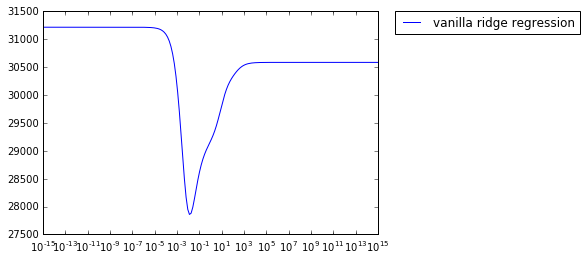

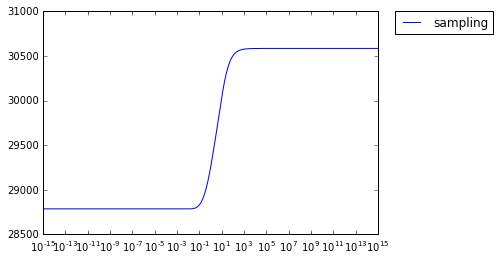

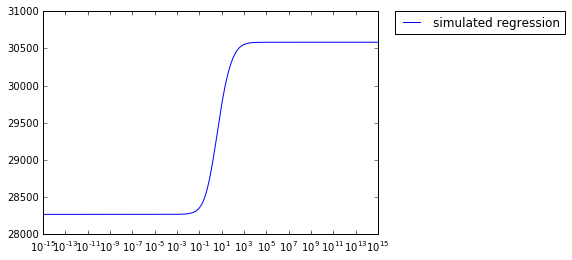

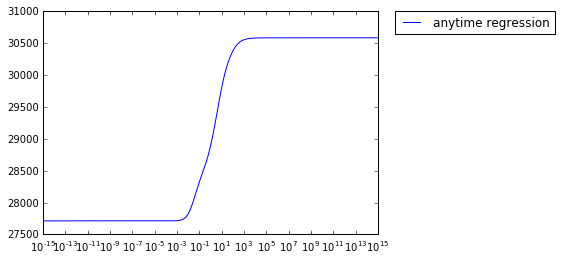

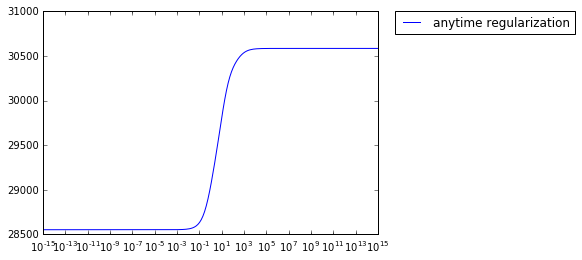

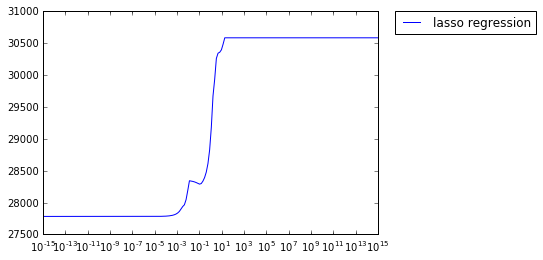

In [322]:
error_total = []
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

# sampling method
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam,label='sampling')
error_total.append(error)

# simulated regression 
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='simulated regression')
error_total.append(error)

# Anytime regression
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regression')
error_total.append(error)

# Anytime regularization
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regularization(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regularization')
error_total.append(error)

# vanilla lasso
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_lasso_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='lasso regression')
error_total.append(error)

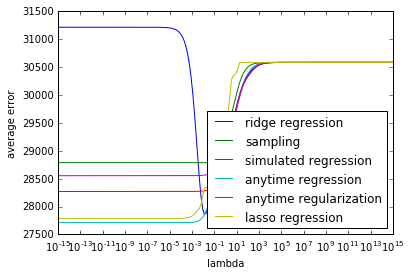

In [323]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='ridge regression')
ax.plot(lam,error_total[1], label='sampling')
ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.plot(lam,error_total[4], label='anytime regularization')
ax.plot(lam,error_total[5], label='lasso regression')
#ax.plot(lam,error_total[5], label='baseline')
ax.set_xscale('log')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc=0)
ax.set_xlabel('lambda')
ax.set_ylabel('average error')
plt.savefig('diabete_draft.pdf')
plt.show()

# UCI wine data

In [324]:
test_data_home = tempfile.mkdtemp()
llfw = fetch_mldata('uci-20070111-wine', data_home=test_data_home)
X = llfw.data
#X = preprocessing.normalize(X, norm='l2')
y = llfw.target


In [325]:
X = llfw.data
X = preprocessing.normalize(X, norm='l2')
y = llfw.target


In [333]:
X_train = np.array(X[0:X.shape[0]/2,:])
y_train = np.array(y[0:X.shape[0]/2])
X_test = np.array(X[X.shape[0]/2:,:])
y_test = np.array(y[X.shape[0]/2:])

In [334]:
#p = np.random.rand(X.shape[1])
#p = np.array([0.2, 0.8, 0.6, 0.1])
p = np.array([0.6,0.4,0.1,0.2])
#w = np.random.rand(X.shape[1])
X_train_mod = modify_data(X_train,X_train,p)
X_test = modify_data(X_test,X_train,p)

In [335]:
print 'p'
print p

p
[ 0.6  0.4  0.1  0.2]


In [336]:
X_train.shape

(89, 4)

In [337]:
error_total = []

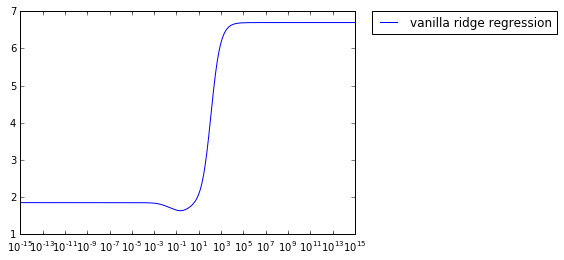

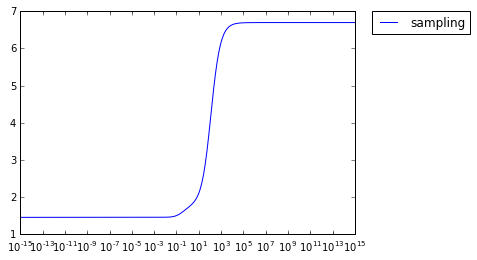

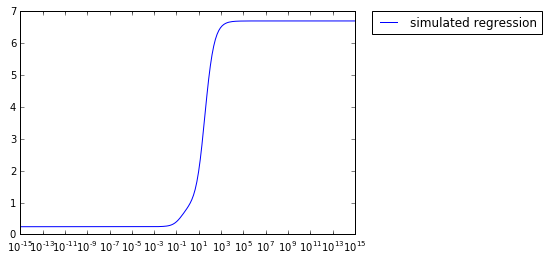

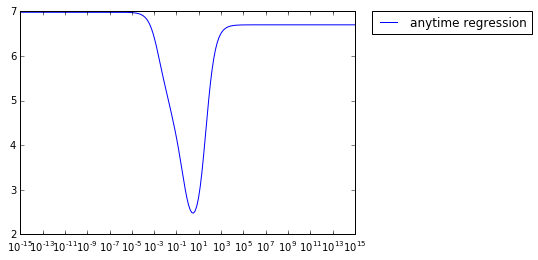

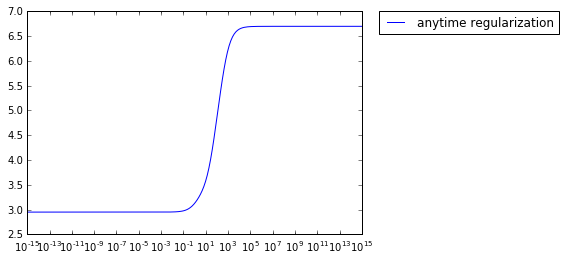

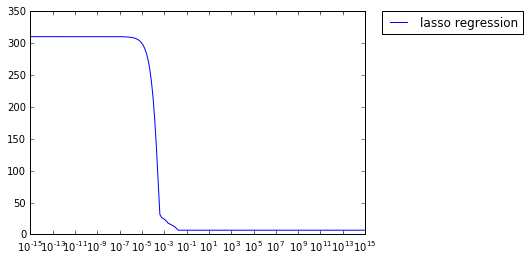

In [338]:
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr,
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

# sampling method
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam,label='sampling')
error_total.append(error)

# simulated regression 
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='simulated regression')
error_total.append(error)

# Anytime regression
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regression')
error_total.append(error)

# Anytime regularization
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regularization(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regularization')
error_total.append(error)

# vanilla lasso
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_lasso_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='lasso regression')
error_total.append(error)

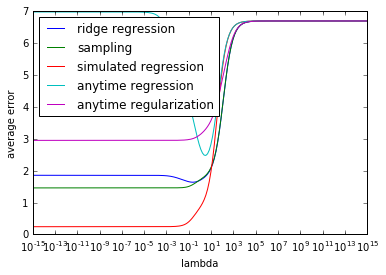

In [339]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='ridge regression')
ax.plot(lam,error_total[1], label='sampling')
ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.plot(lam,error_total[4], label='anytime regularization')
#ax.plot(lam,error_total[5], label='lasso regression')
#ax.plot(lam,error_total[5], label='baseline')
ax.set_xscale('log')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc=0)
ax.set_xlabel('lambda')
ax.set_ylabel('average error')
plt.savefig('wine_draft.pdf')
plt.show()

# uci-20070111-waveform-5000

In [226]:
test_data_home = tempfile.mkdtemp()
lfw = fetch_mldata('uci-20070111-waveform-5000', data_home=test_data_home)


In [237]:
y = lfw.data
X = preprocessing.normalize(X)
X = lfw.target.T

In [238]:
X_train = np.array(X[0:X.shape[0]/2,:])
y_train = np.array(y[0:X.shape[0]/2])
X_test = np.array(X[X.shape[0]/2:,:])
y_test = np.array(y[X.shape[0]/2:])

In [125]:
"""
X_train_sum = np.sum(X_train,axis=0)
X_train_mean = np.mean(X_train,axis=0)
X_test_mean = np.mean(X_test,axis=0)
X_test_sum = np.sum(X_test,axis=0)
X_train = (X_train - np.matlib.repmat(X_train_mean,X_train.shape[0],1))/X_train_sum
X_test = (X_test - np.matlib.repmat(X_test_mean,X_test.shape[0],1))/X_test_sum
"""

'\nX_train_sum = np.sum(X_train,axis=0)\nX_train_mean = np.mean(X_train,axis=0)\nX_test_mean = np.mean(X_test,axis=0)\nX_test_sum = np.sum(X_test,axis=0)\nX_train = (X_train - np.matlib.repmat(X_train_mean,X_train.shape[0],1))/X_train_sum\nX_test = (X_test - np.matlib.repmat(X_test_mean,X_test.shape[0],1))/X_test_sum\n'

In [239]:
ww =(vanilla_ridge_regression(X_train,y_train,1000)).tolist()
ww = [1/abs(i[0]) for i in ww]
print ww
max_p = max(ww)
print max_p
p = np.array([i/max_p for i in ww])

[672.3420795073108, 283.88821883647506, 62.77279547306927, 46.441216363576736, 29.06785279917031, 18.282474882545294, 50.726503891363336, 194.94844588946117, 16.825715227950667, 11.61623120121164, 11.210029343613792, 15.842190614806366, 14.370871171767915, 25.28079523448619, 376.5676811722589, 46.304368193086766, 65.58882770219832, 93.15386244107009, 2331.3872496727154, 50.848603729470476, 256.5960592291131, 7169.682581620851, 3659.797316639197, 389.6008529084977, 119.51007390626337, 75.11128562216106, 69.71366132187146, 174.212472542826, 248.1721096121414, 4486.2693637365865, 157.81774284129614, 225.71921528721404, 828.2915943867968, 104.03061190442422, 246.80887010043665, 394.64175544781637, 89.15020088707519, 118.48134932871889, 142.11231075655186, 1031.3979591842644]
7169.68258162


In [240]:
p

array([ 0.09377571,  0.03959565,  0.00875531,  0.00647744,  0.00405427,
        0.00254997,  0.00707514,  0.02719067,  0.00234679,  0.00162019,
        0.00156353,  0.00220961,  0.00200439,  0.00352607,  0.05252222,
        0.00645836,  0.00914808,  0.01299275,  0.32517301,  0.00709217,
        0.03578904,  1.        ,  0.51045458,  0.05434004,  0.01666881,
        0.01047624,  0.0097234 ,  0.02429849,  0.0346141 ,  0.62572775,
        0.02201182,  0.03148246,  0.11552695,  0.01450979,  0.03442396,
        0.05504313,  0.01243433,  0.01652533,  0.01982128,  0.14385546])

In [241]:
#X_train *= 100
#X_test *= 100
#p = np.random.rand(X.shape[1])
#print p
X_train_mod = modify_data(X_train,X_train,p)
X_test = modify_data(X_test,X_train,p)

In [242]:
X_train_mod

array([[-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       [-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       [-0.01808 ,  1.      ,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       ..., 
       [-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       [-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       [-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852]])

In [243]:
X_test

array([[-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       [-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       [-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,  0.67    ],
       ..., 
       [ 0.64    ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       [-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,
         0.016852],
       [-0.01808 ,  0.330324,  0.630688, ..., -0.005124,  0.014904,  0.61    ]])

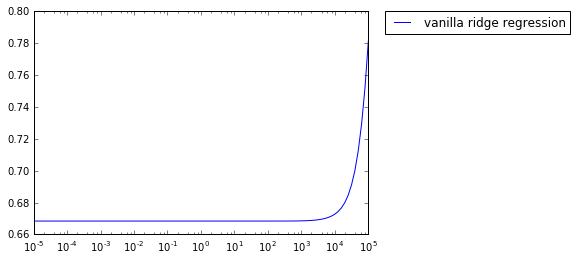

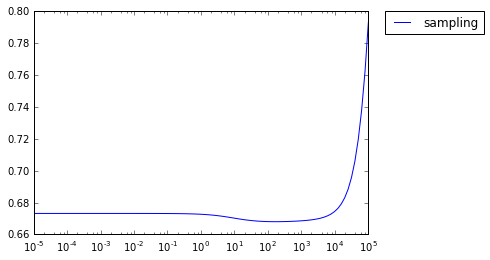

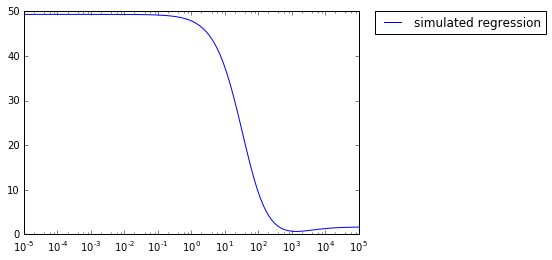

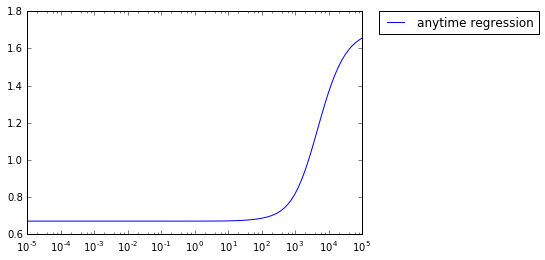

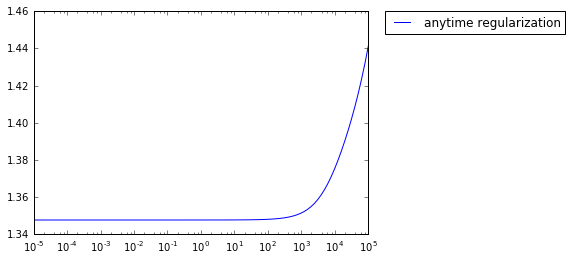

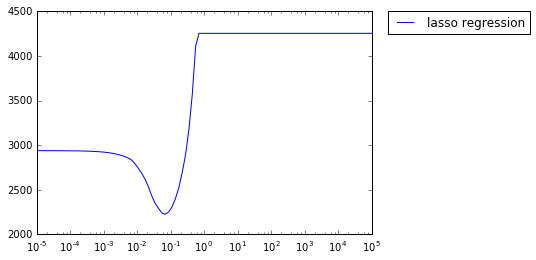

In [244]:
error_total = []
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

# sampling method
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error'
#print error
plot(error,lam,label='sampling')
error_total.append(error)

# simulated regression 
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='simulated regression')
error_total.append(error)

# Anytime regression
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regression')
error_total.append(error)

# Anytime regularization
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regularization(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='anytime regularization')
error_total.append(error)

# vanilla lasso
error = np.zeros(lam.shape[0],)
#print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_lasso_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
#print 'error '
#print error
plot(error,lam,label='lasso regression')
error_total.append(error)

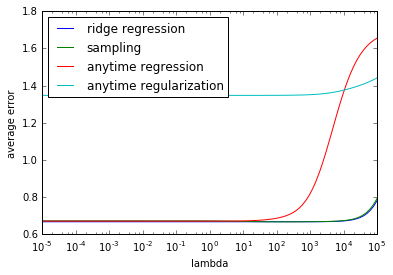

In [246]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='ridge regression')
ax.plot(lam,error_total[1], label='sampling')
#ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.plot(lam,error_total[4], label='anytime regularization')
#ax.plot(lam,error_total[5], label='lasso regression')
#ax.plot(lam,error_total[5], label='baseline')
ax.set_xscale('log')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc=0)
ax.set_xlabel('lambda')
ax.set_ylabel('average error')
plt.savefig('waveform_draft.pdf')
plt.show()

In [348]:
X = [[1,1,1,1,1,-1,1,-1,-1,-1],[1,1,-1,-1,-1,1,-1,-1,-1,-1]]
X = np.array(X).T
y = np.array([1,1,1,1,1,-1,-1,-1,-1,-1])

In [349]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

In [350]:
w

array([ 0.8,  0.2])

In [365]:
X_test = [[1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,-1],[-0.4,1,-1,-1,-1,1,-1,-1,-1,-1]]
X_test = np.array(X_test).T
y_test = y

In [406]:
y_pred = np.dot(X_test,w)
y_pred

array([ 0.72,  0.36, -0.04, -0.04, -0.04,  0.36, -0.04, -0.04, -0.04, -1.  ])

In [408]:
error = prediction_error(X_test,y_test,w)
error

2.8891521247590961

In [375]:
X_samp = [[0.2,0.2,1,0.2,0.2,0.2,0.2,-1,0.2,0.2],[1,1,-0.4,-1,-1,1,-1,-1,-1,-1]]
X_samp = np.array(X_samp).T

In [409]:
w_samp = np.dot(np.dot(np.linalg.inv(np.dot(X_samp.T,X_samp)),X_samp.T),y)
w_samp

array([ 0.8391793,  0.2655201])

In [410]:
error_samp = prediction_error(X_test,y_test,w_samp)
error_samp

2.9180668877256868

In [411]:
y_pred_samp = np.dot(X_test,w_samp)
y_pred_samp

array([ 0.73297126,  0.43335596, -0.09768424, -0.09768424, -0.09768424,
        0.43335596, -0.09768424, -0.09768424, -0.09768424, -1.1046994 ])

In [412]:
X_test_0 = [[1,0,0,0,0,0,0,0,0,-1],[0,1,-1,-1,-1,1,-1,-1,-1,-1]]
X_test_0 = np.array(X_test_0).T

In [413]:
error = prediction_error(X_test_0,y_test,w)
error

2.8913664589601922

In [414]:
p = np.array([0.2,0.9])

In [427]:
w_vrr = vanilla_ridge_regression(X,y,0)
print  w_vrr
error_vrr = prediction_error(X_test,y_test,w_vrr)
print error_vrr

[ 0.8  0.2]
2.88915212476
